### Visualization and Data Exploring of Med Cab Data
- Numerical describe of distribuition Type
- Percentage of distribuition Type 
- Top 10 Consumer Rating
- Top 10 Flavors
- Strains with Top Five Ratings
- Sativas Strain Effects
- Indica Strain Effects
- Sativa flavors
- Indica flavors
- Hybrid flavors

In [ ]:
# Classics
import pandas as pd
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/jorge/Med-Cabinet-2/Data/cannabis.csv')
df.head(2)

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...


In [3]:
df['Type']=df['Type'].astype(str)

In [4]:
print(df.nunique())

Strain         2350
Type              3
Rating           26
Effects        1655
Flavor         1293
Description    2312
dtype: int64


In [5]:
print("Numerical describe of distribuition Type")
print(df.groupby("Type")["Strain"].count())
print("Percentage of distribuition Type ")
print((df.groupby("Type")["Strain"].count() / len(df.Type) * 100).round(decimals=2))

Numerical describe of distribuition Type
Type
hybrid    1212
indica     699
sativa     440
Name: Strain, dtype: int64
Percentage of distribuition Type 
Type
hybrid    51.55
indica    29.73
sativa    18.72
Name: Strain, dtype: float64


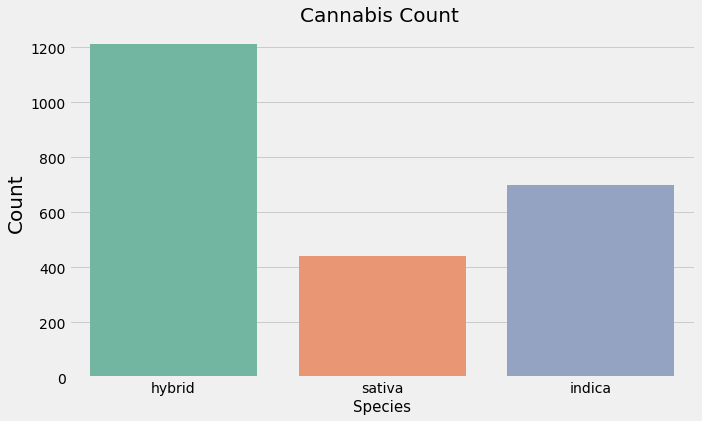

In [7]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,6))
sns.countplot(x="Type", data=df, palette='Set2')
plt.xlabel('Species', fontsize=15)
plt.ylabel('Count', fontsize=20)
plt.title("Cannabis Count ", fontsize=20)
plt.show()

Top 10 Consumer Rating
4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
Name: Rating, dtype: int64


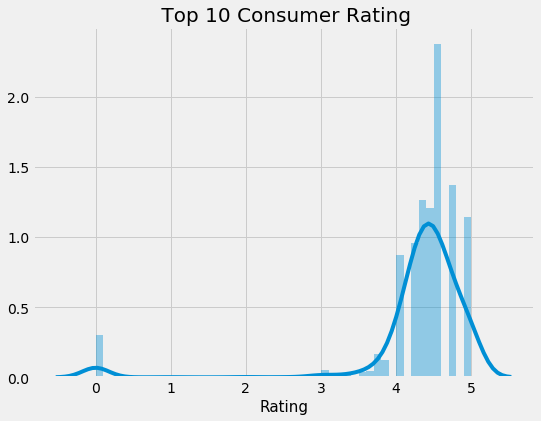

In [18]:
print("Top 10 Consumer Rating")
print(df["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
g = sns.distplot(df["Rating"], bins=50)
g.set_title(" Top 10 Consumer Rating", size = 20)
g.set_xlabel('Rating', fontsize=15)
plt.rcParams['figure.dpi'] = 72

In [9]:
# Extracting the values in Effects and Flavor and to an additional new column
df_effect = pd.DataFrame(df.Effects.str.split(',',4).tolist(),
             columns = ['Effect_1','Effect_2','Effect_3','Effect_4','Effect_5'])

df_flavors = pd.DataFrame(df.Flavor.str.split(',',n=2,expand=True).values.tolist(),
                          columns = ['Flavor_1','Flavor_2','Flavor_3'])


In [10]:
# Concatenating all new variables with strains
df = pd.concat([df, df_effect], axis=1)
df = pd.concat([df, df_flavors], axis=1)

# Looking the result
df.head()

,Strain,Type,Rating,Effects,Flavor,Description,Effect_1,Effect_2,Effect_3,Effect_4,Effect_5,Flavor_1,Flavor_2,Flavor_3
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange


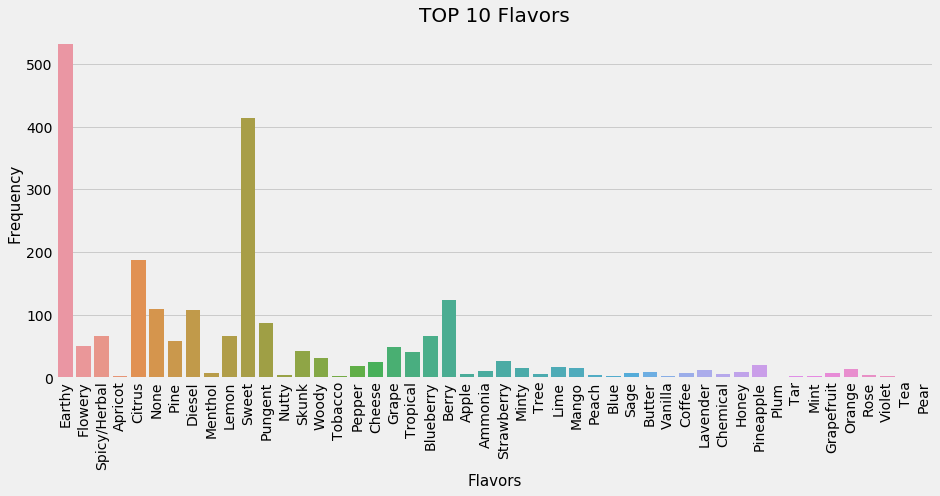

In [29]:
plt.figure(figsize=(14,6))
sns.countplot('Flavor_1', data=df)
plt.xticks(rotation=90)
plt.xlabel('Flavors', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title("TOP 10 Flavors", fontsize=20)
plt.show()

Percentual of Species of Cannabis with a Rating equal to five:
Type
hybrid    48.57
indica    33.33
sativa    18.10
Name: Strain, dtype: float64


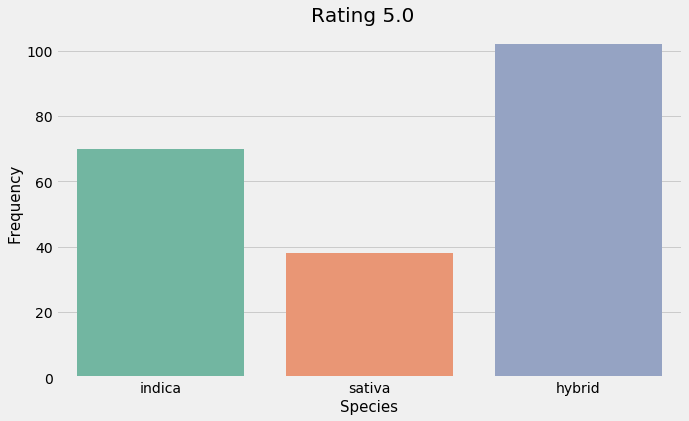

In [16]:
# Strains with top five ratings

print("Percentual of Species of Cannabis with a Rating equal to five:")
top_five_rating = (df[df["Rating"] == 5].groupby("Type")["Strain"].count() \
               / len(df[df["Rating"] == 5]) *100).round(decimals=2)
print(top_five_rating)
plt.figure(figsize=(10,6))
g = sns.countplot(x="Type",data=df[df["Rating"] == 5], palette='Set2')
g.set_xlabel('Species', fontsize=15)
g.set_ylabel('Frequency', fontsize=15)
g.set_title("Rating 5.0  ", fontsize=20)

plt.show()

In [19]:
# Let's create subsets by each type and explore their Flavors and Effects
hibridas = df[df.Type == 'hybrid']
indicas = df[df.Type == 'indica']
sativas = df[df.Type == 'sativa']

In [20]:
# Here we are deleting columns no longer being utilized
del df["Effects"]
del df["Flavor"]

In [21]:
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

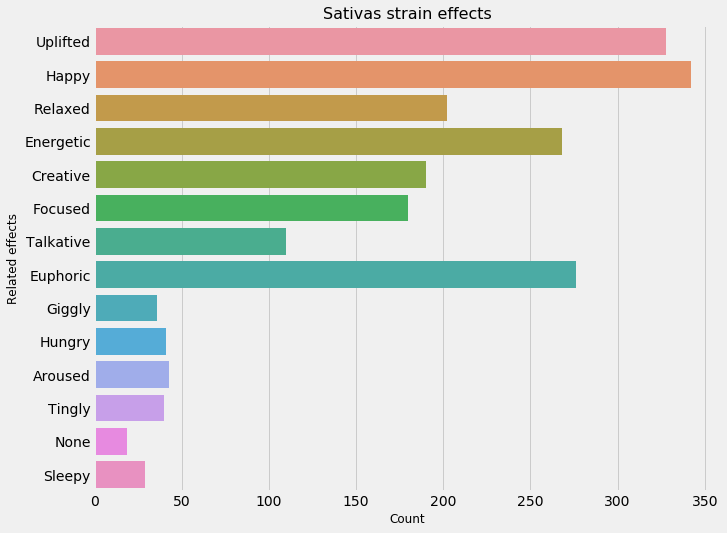

In [22]:
# effects of Sativa
sativa_effects = get_effects(sativas)

#Let see the distribuition of effects by types
plt.figure(figsize=(10,8))
sns.barplot(list(sativa_effects.values()), list(sativa_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Related effects", fontsize=12)
plt.title("Sativas strain effects", fontsize=16)
plt.show()

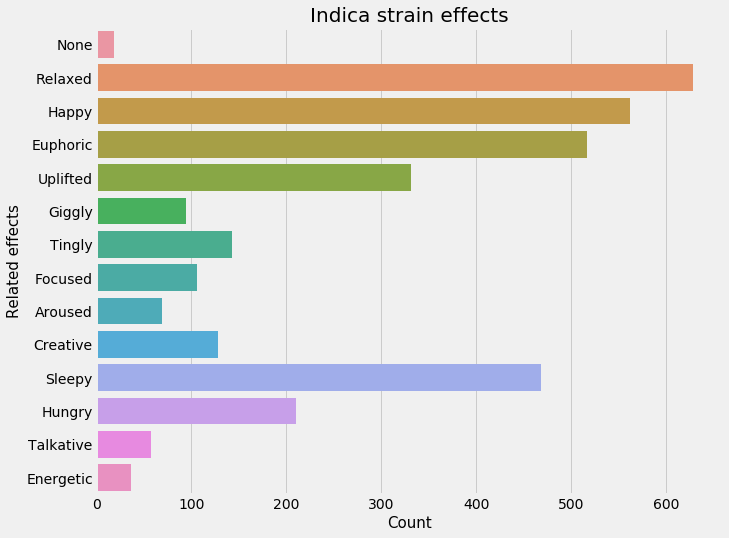

In [23]:
# effects of indicas 
indica_effects = get_effects(indicas)

# Ploting Indica Effects
plt.figure(figsize=(10,8))
sns.barplot(list(indica_effects.values()),list(indica_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Indica strain effects", fontsize=20)
plt.show()

In [24]:
#Creating flavors to cut each flavor by row
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

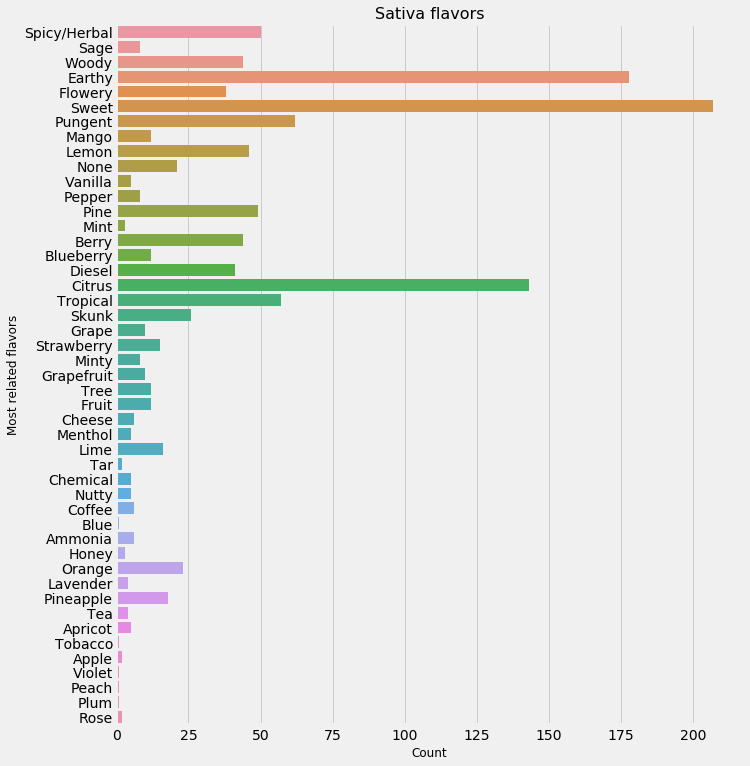

In [25]:
#Runing flavors counts to sativas
sativa_flavors = flavors(sativas)

plt.figure(figsize=(10,12))
sns.barplot(list(sativa_flavors.values()),list(sativa_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors", fontsize=12)
plt.title("Sativa flavors", fontsize=16)
plt.show()

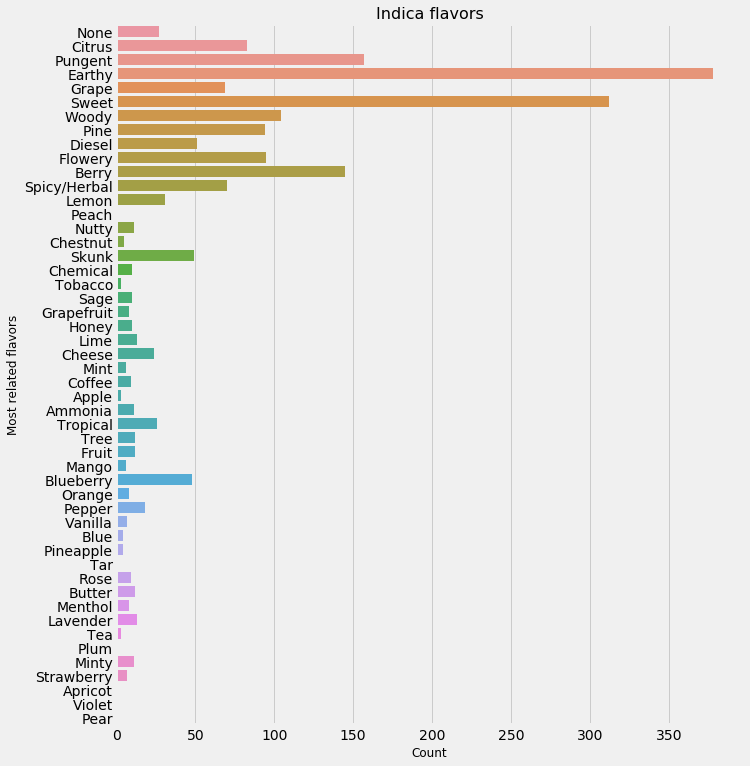

In [26]:
indica_flavors = flavors(indicas)

plt.figure(figsize=(10,12))
sns.barplot(list(indica_flavors.values()),list(indica_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors",fontsize=12)
plt.title("Indica flavors", fontsize=16)
plt.show()

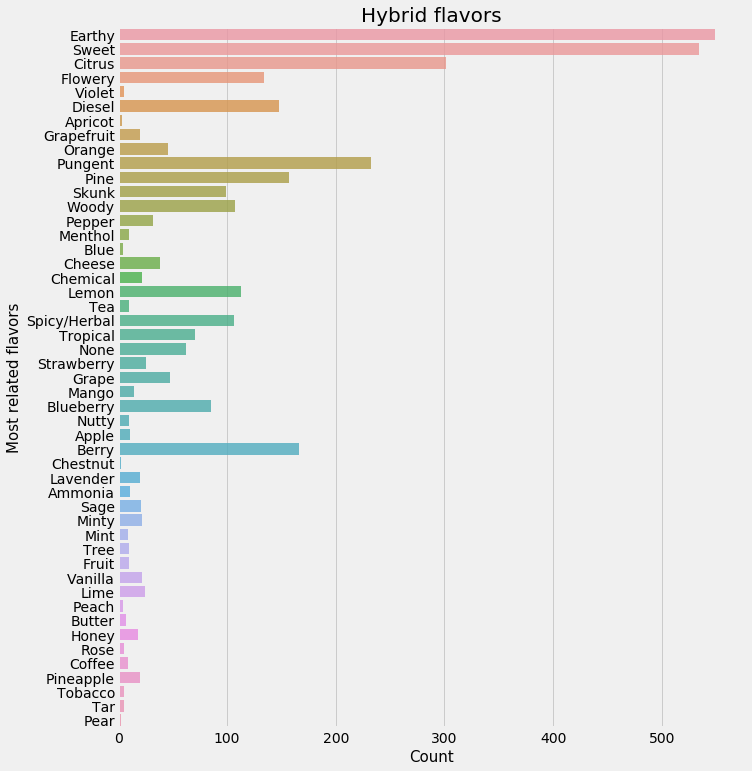

In [28]:
#  Hybrid flavors
Hybrid_flavors = flavors(hibridas)

plt.figure(figsize=(10,12))
sns.barplot(list(hibridas_flavors.values()),list(hibridas_flavors.keys()), alpha=0.8,orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Most related flavors", fontsize=15)
plt.title("Hybrid flavors", fontsize=20)
plt.show()